<a href="https://colab.research.google.com/github/juanmanuelvillacis/lab-correlation-tests-with-scipy/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [41]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
from scipy.stats import linregress
import pylab as plt 



# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [42]:
# Run this code:

fifa = pd.read_csv('/content/drive/MyDrive/Iron Hack/LABs/csv_docs/fifa.csv')


Let's examine the dataset by looking at the `head`.

In [58]:
# Your code here:
fifa[fifa['Value'].str.contains('K')]['Value']


926      €600K
1294     €525K
1625     €900K
1668     €900K
1720     €450K
         ...  
18202     €60K
18203     €60K
18204     €60K
18205     €60K
18206     €60K
Name: Value, Length: 11060, dtype: object

Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [46]:
# Your code here:
s = []
#corregir la conversion de K y M
for a in fifa['Value']:
  if 'K' in a:
    a =a.replace('€','').replace('K','')    
    a = float(a)
    a = a/1000
    s.append(a)
  elif 'M' in a:
    a =a.replace('€','').replace('M','')    
    a = float(a)
    s.append(a)
  else:
    a =a.replace('€','')   
    a = float(a)
    s.append(a) 
#l = [a.translate(str.maketrans({'€':'','M':'','K':''})) for a in fifa['Value']]
fifa['ValueNumeric']= s
fifa['ValueNumeric'].dtype

dtype('float64')

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [47]:
# Your code here:
from statsmodels.formula.api import ols
import statsmodels.api as sm

formula = 'ValueNumeric ~ C(Position) + C(fifa["Preferred Foot"])'

modelo = ols(formula=formula, data=fifa).fit()

anova_table = sm.stats.anova_lm(modelo, typ=1)

anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Position),26.0,16496.092002,634.465077,20.791849,5.031960e-96
"C(fifa[""Preferred Foot""])",1.0,234.162243,234.162243,7.673655,5.608990e-03
Residual,18119.0,552902.860021,30.515087,NaN,NaN


What is your conclusion from this ANOVA?

In [48]:
# Your conclusions here:
'''
From the P value we can conclude that there is a week relation between the positoin and the value.
Nevertheless, the p value of Preferred Foot and Vale nuemric is higher than 0.05 meaning that the relation between the two values is strong and we conserve the nule hypothesis
'''


'\nFrom the P value we can conclude that there is a week relation between the positoin and the value.\nNevertheless, the p value of Preferred Foot and Vale nuemric is higher than 0.05 meaning that the relation between the two values is strong and we conserve the nule hypothesis\n'

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [49]:
# Your code here:


formula = 'ValueNumeric ~ C(Nationality)'

modelo = ols(formula=formula, data=fifa).fit()

anova_table = sm.stats.anova_lm(modelo, typ=1)

anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Nationality),163.0,32812.244217,201.302112,6.762478,4.840477e-134
Residual,18043.0,537095.118316,29.767506,NaN,NaN


What is your conclusion from this ANOVA?

In [50]:
'''
The p value is less than the range of confidence interval of 0.05 then the nule hypothesis is rejected
'''

'\nThe p value is less than the range of confidence interval of 0.05 then the nule hypothesis is rejected\n'

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [51]:
# Your code here:

delete = fifa[fifa['SprintSpeed'].isnull()==True].index

fifa.drop(delete,axis=0,inplace=True)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [52]:
# Your code here:
x = sm.add_constant(
    fifa[[
          'Stamina',
          'SprintSpeed'
    ]]
)
y = fifa['ValueNumeric']
modelo = sm.OLS(y, x).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     450.5
Date:                Mon, 04 Oct 2021   Prob (F-statistic):          1.17e-191
Time:                        05:14:27   Log-Likelihood:                -56614.
No. Observations:               18159   AIC:                         1.132e+05
Df Residuals:                   18156   BIC:                         1.133e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0254      0.195    -15.543      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [53]:
# Your conclusions here:
'''
By the r2 value being close to 0 the variation is low and the p estatistic value is below the confidence interval of 0.05
'''


'\nBy the r2 value being close to 0 the variation is low and the p estatistic value is below the confidence interval of 0.05\n'

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [54]:
# Your code here:
x = sm.add_constant(fifa['Potential'])

y = fifa['ValueNumeric']

modelo = sm.OLS(y, x).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     9040.
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        05:14:27   Log-Likelihood:                -53385.
No. Observations:               18159   AIC:                         1.068e+05
Df Residuals:                   18157   BIC:                         1.068e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.1281      0.396    -88.632      0.000     -35.905     -34.351
Potential      0.5264      0.006     95.078      0.000       0.516       0.537
==============================================================================
Omnibus:                    23377.748   Durbin-Watson:                   0.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6503246.364
Skew:                           7.031   Prob(JB):                         0.00
Kurtosis:                      94.637   Cond. No.                         835.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [55]:
# Your conclusions here:



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [56]:
x = fifa['ValueNumeric']
y = fifa['Potential']
linreg = linregress(x, y)
linreg

LinregressResult(slope=0.6313982972780046, intercept=69.79358425376547, rvalue=0.5765277675148193, pvalue=0.0, stderr=0.006640861331846189)

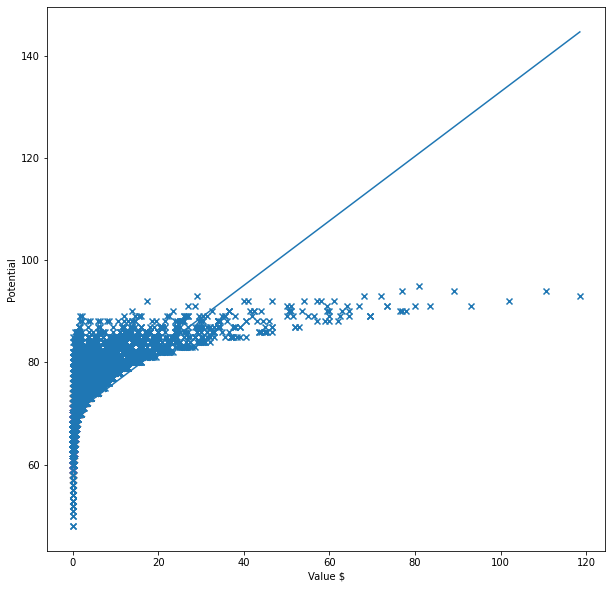

In [57]:
# Your code here:

x_ = np.linspace(x.min(), x.max(), num=50)

y_ = linreg[0]*x_+linreg[1] # m*x+b

plt.figure(figsize=(10, 10))
plt.plot(x_, y_)
plt.scatter(x, y, marker='x')
plt.xlabel('Value $')
plt.ylabel('Potential');
